# ( Credit Score Forecasting Analysis)

# **Information about Dataset**

Recours: https://www.kaggle.com/datasets/parisrohan/credit-score-classification 

**1-ID: Represents a unique identification of an entry**

**2-Customer_ID: Represents a unique identification of a person**

**3-Month: Represents the month of the year**

**4-Name: Represents the name of a person**

**5-Age: Represents the age of the person**

**6-SSN: Represents the social security number of a person**

**7-Occupation: Represents the occupation of the person**

**8-Annual_Income: Represents the annual income of the person**

**9-Monthly_Inhand_Salary:Represents the monthly base salary of a person**

**10-Num_Bank_Accounts: Represents the number of bank accounts a person holds**

**11-Num_Credit_Card: Represents the number of other credit cards held by a person**

**12-Interest_Rate: Represents the interest rate on credit card**

**13-Num_of_Loan: Represents the number of loans taken from the bank**

**14-Type_of_Loan: Represents the types of loan taken by a person**

**15-Delay_from_due_date: Represents the average number of days delayed from the payment date**

**16-Num_of_Delayed_Payment: Represents the average number of payments delayed by a person**

**17-Changed_Credit_Limit: Represents the percentage change in credit card limit**

**18-Num_Credit_Inquiries: Represents the number of credit card inquiries**

**19-Credit_Mix: Represents the classification of the mix of credits**

**20-Outstanding_Debt: Represents the remaining debt to be paid (in USD)**

**21-Credit_Utilization_Ratio: Represents the utilization ratio of credit card**

**22-Credit_History_Age: Represents the age of credit history of the person**

**23-Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person**

**24-Total_EMI_per_month: Represents the monthly EMI payments (in USD)**

**25-Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)**

**26-Payment_Behaviour: Represents the payment behavior of the customer (in USD)**

**27-Monthly_Balance: Represents the monthly balance amount of the customer (in USD)**

**28-Credit Score: Represents the bracket of credit score (Poor, Standard, Good)**

# Step 1: Preparing the Data

**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

**Reading Data File**

In [2]:
data=pd.read_csv("credit_score.csv")
pd.set_option("display.max.columns", None)
data.head(8)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,21.46538,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,21.46538,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,272.0,No,49.574949,21.46538,High_spent_Medium_value_payments,358.124168,Standard


**Displaying Data Info**


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

**Displaying Data Statistics**

In [126]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**Droping Unneaded Columns**

In [127]:
data.drop('ID',axis=1,inplace=True)

**Check Duplicates**

In [128]:
data.duplicated().sum()

0

**Check the original Number of Customers ==> every Customer have 8 Records**

**There is 12500 customer in the data**

In [129]:
data['Month'].value_counts()

1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: Month, dtype: int64

# hypthesis generation

**We are generate 4 hypthesis and after the analysis we decide if it Accepted or Rejected**

# Step 2: Preparing Relationships

**Heatmap to show the corelations between the features, in order to get the right relationships**

<AxesSubplot:>

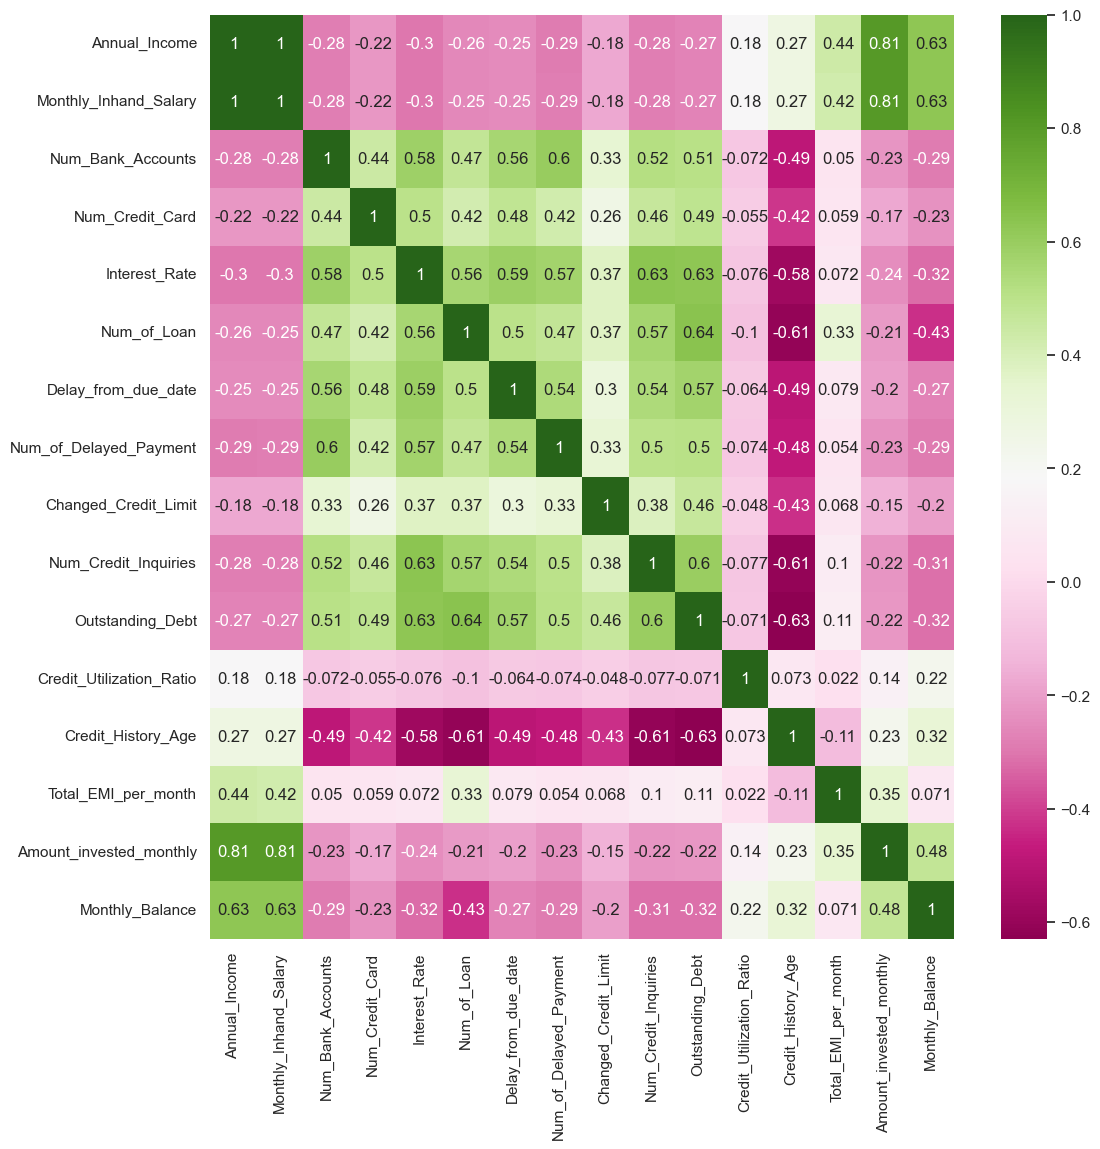

In [107]:
plt.figure(figsize=(12,12))
sns.heatmap(data.iloc[:,5:].corr(),annot=True,fmt='.2g',cmap='PiYG')

**Transform Credit_Score column**

In [130]:
data2=data.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data2['Credit_Score']=le.fit_transform(data2['Credit_Score'])

**Correlations with the Targets**

In [131]:
data2.corr()['Credit_Score']

Customer_ID                -0.009946
Month                      -0.038069
Age                        -0.058923
SSN                         0.011919
Annual_Income              -0.080700
Monthly_Inhand_Salary      -0.078770
Num_Bank_Accounts           0.177389
Num_Credit_Card             0.113333
Interest_Rate               0.121088
Num_of_Loan                 0.064064
Delay_from_due_date         0.097286
Num_of_Delayed_Payment      0.203116
Changed_Credit_Limit        0.190080
Num_Credit_Inquiries        0.067845
Outstanding_Debt            0.037153
Credit_Utilization_Ratio   -0.014371
Credit_History_Age         -0.102598
Total_EMI_per_month        -0.059341
Amount_invested_monthly    -0.068770
Monthly_Balance            -0.047380
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

In [132]:
data2.corr('kendall')['Credit_Score']

Customer_ID                -0.007289
Month                      -0.030345
Age                        -0.026800
SSN                         0.010220
Annual_Income              -0.027516
Monthly_Inhand_Salary      -0.026322
Num_Bank_Accounts           0.086977
Num_Credit_Card             0.036555
Interest_Rate               0.051696
Num_of_Loan                 0.009885
Delay_from_due_date         0.059179
Num_of_Delayed_Payment      0.105942
Changed_Credit_Limit        0.139683
Num_Credit_Inquiries        0.006911
Outstanding_Debt           -0.032742
Credit_Utilization_Ratio   -0.005549
Credit_History_Age         -0.036415
Total_EMI_per_month        -0.025297
Amount_invested_monthly    -0.028829
Monthly_Balance            -0.009241
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

In [133]:
data2.corr('spearman')['Credit_Score']

Customer_ID                -0.009358
Month                      -0.036735
Age                        -0.034029
SSN                         0.013132
Annual_Income              -0.036622
Monthly_Inhand_Salary      -0.035014
Num_Bank_Accounts           0.114610
Num_Credit_Card             0.049838
Interest_Rate               0.081200
Num_of_Loan                 0.012349
Delay_from_due_date         0.084402
Num_of_Delayed_Payment      0.141849
Changed_Credit_Limit        0.180935
Num_Credit_Inquiries        0.014814
Outstanding_Debt           -0.044360
Credit_Utilization_Ratio   -0.007148
Credit_History_Age         -0.046641
Total_EMI_per_month        -0.031603
Amount_invested_monthly    -0.037368
Monthly_Balance            -0.012456
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

**Boxplot to check Outliers**

In [134]:
my_pal = {"Good": "#921D87", "Standard": "#FFB632", "Poor":"#BE7AF3"}

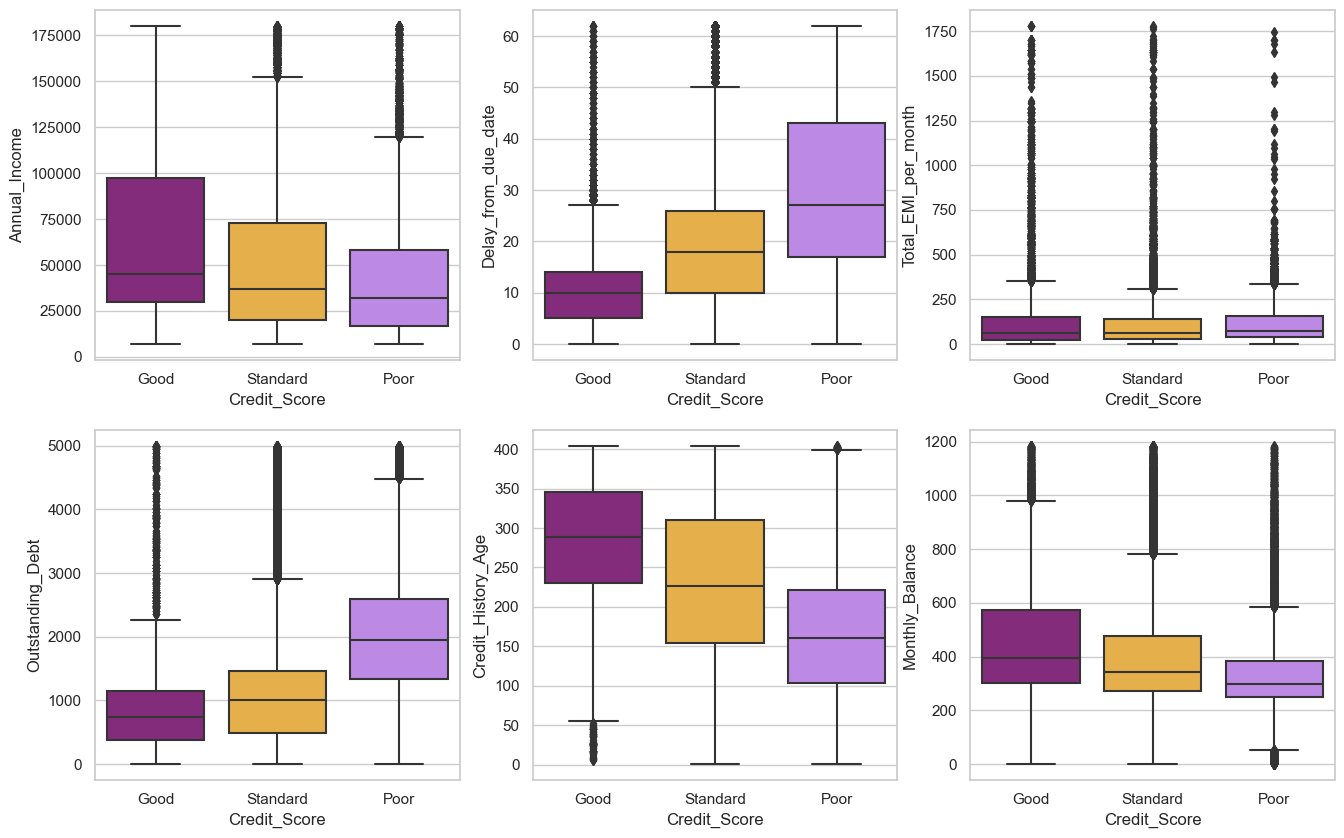

In [113]:
#Displaying Features Relationships with the target (Credit Score)
list_col=['Annual_Income','Delay_from_due_date','Total_EMI_per_month','Outstanding_Debt','Credit_History_Age','Monthly_Balance']
fig,ax=plt.subplots(figsize=(16,10))
for i,j in enumerate(list_col):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=data['Credit_Score'], y=data[j],palette=my_pal)
plt.show()

In [135]:
def countoutlier(dataset, features):
    # a function to count how many outliers are present in a numerical list
    for feature in features:

        # calculating the outlier boundaries
        Q1 = dataset[feature].quantile(0.25)
        Q3 = dataset[feature].quantile(0.75)
        IQR = Q3 - Q1
        UBoundary = Q3 + 1.5 * IQR
        LBoundary = Q1 - 1.5 * IQR

        # counting the outliers
        outliercount = 0
        for i in dataset[feature]:
            if i > UBoundary or i < LBoundary:
                outliercount = outliercount + 1
            else:
                pass
        if outliercount!=0:
            # displaying the outliers count report
            print('Outlier count in', feature, ':', outliercount)

In [136]:
numeric_data = data.select_dtypes(include=[np.number]).columns
categorical_data = data.select_dtypes(exclude=[np.number]).columns

In [137]:
numeric_data

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

**most of outliers due to Annual Income and the high class in community**

Outliers in Annual Income is directly related with outliers in [Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance]

Outliers in Delay_from_due_date is directly related with [Good Credit Score from the low class in community]

In [138]:
countoutlier(data, numeric_data)

Outlier count in Annual_Income : 2000
Outlier count in Monthly_Inhand_Salary : 2017
Outlier count in Delay_from_due_date : 4002
Outlier count in Changed_Credit_Limit : 579
Outlier count in Num_Credit_Inquiries : 787
Outlier count in Outstanding_Debt : 5272
Outlier count in Credit_Utilization_Ratio : 4
Outlier count in Total_EMI_per_month : 5044
Outlier count in Amount_invested_monthly : 4464
Outlier count in Monthly_Balance : 7400


**Skewness reperesent the direction of Outliers in the column**

In [139]:
data.skew()

Customer_ID                 0.011057
Month                       0.000000
Age                         0.156338
SSN                        -0.000153
Annual_Income               1.130223
Monthly_Inhand_Salary       1.128690
Num_Bank_Accounts          -0.190015
Num_Credit_Card             0.225808
Interest_Rate               0.496232
Num_of_Loan                 0.445609
Delay_from_due_date         0.969840
Num_of_Delayed_Payment     -0.214470
Changed_Credit_Limit        0.708342
Num_Credit_Inquiries        0.406825
Outstanding_Debt            1.207536
Credit_Utilization_Ratio    0.028617
Credit_History_Age         -0.048832
Total_EMI_per_month         4.041492
Amount_invested_monthly     1.761036
Monthly_Balance             1.355614
dtype: float64

**Normal distribution for columns that have highest Skewness**

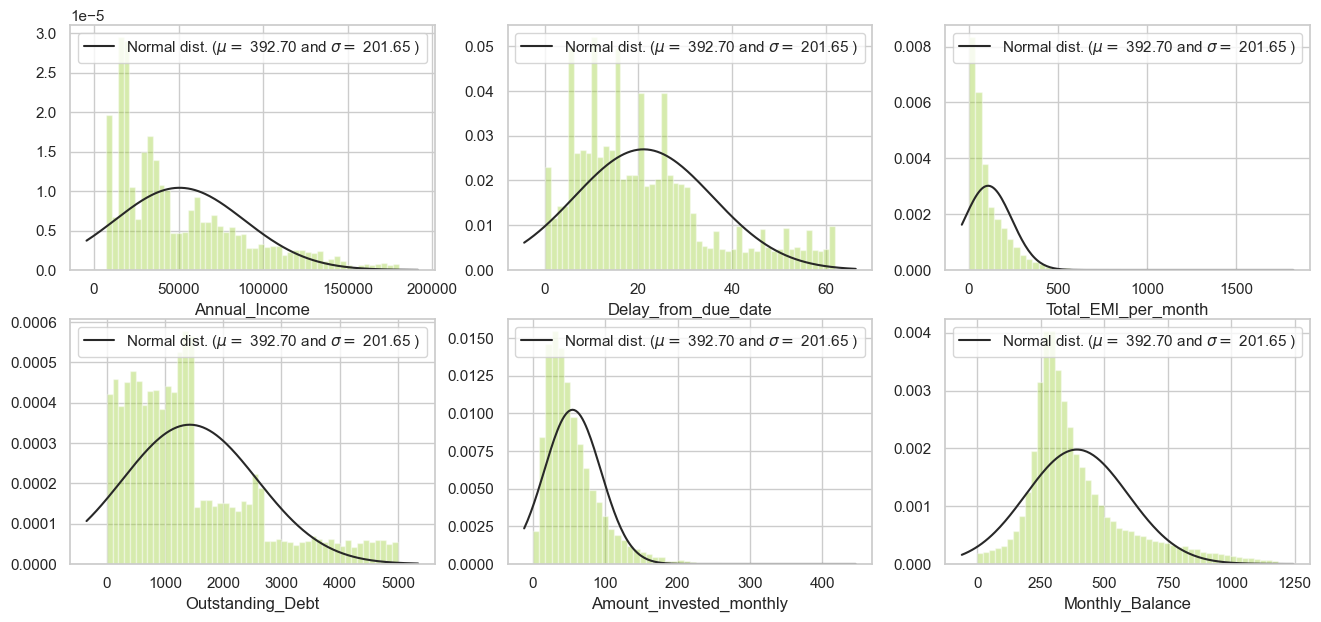

In [119]:
list_col=['Annual_Income','Delay_from_due_date','Total_EMI_per_month','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
fig,ax=plt.subplots(figsize=(16,7))
for i,j in enumerate(list_col):
    plt.subplot(2,3,i+1)
    sns.distplot(data[j],fit=norm,kde=False,color='yellowgreen')
    (mu, sigma) = norm.fit(data['Monthly_Balance'])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.show()

# Step 3: Converting Continuous Variable to Categorical

In [140]:
bins = [0,52000,156000,180000]
labels = ['Lower-Class', 'Middle-Class', 'Upper-Class']
data['Annual-cat']=pd.cut(data.Annual_Income, bins=bins, labels=labels)

In [141]:
annual=data['Annual-cat'].value_counts(normalize=True)

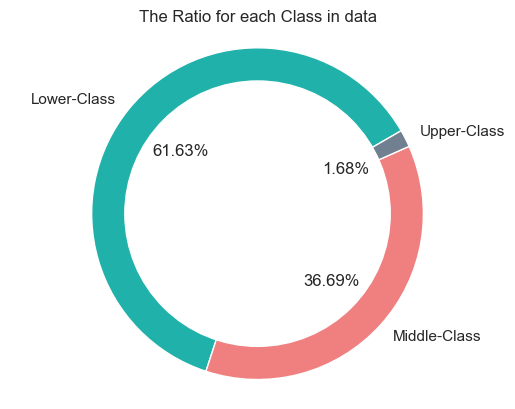

In [142]:
labels=annual.index
sizes=annual.values
fig, ax = plt.subplots()
ax.pie(x=sizes, labels=labels, startangle=30,autopct='%1.2f%%',colors=['lightseagreen','lightcoral','slategrey'])
ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('The Ratio for each Class in data')
plt.show()

**Credit History Age Categories**

In [143]:
bins = [0,12,60,120,405]
labels = ['less_than_year', '1-5 years', '5-10 years','greater_than_10 years']
data['history-age-cat']=pd.cut(data.Credit_History_Age, bins=bins, labels=labels)

In [144]:
history=data['history-age-cat'].value_counts(normalize=True)

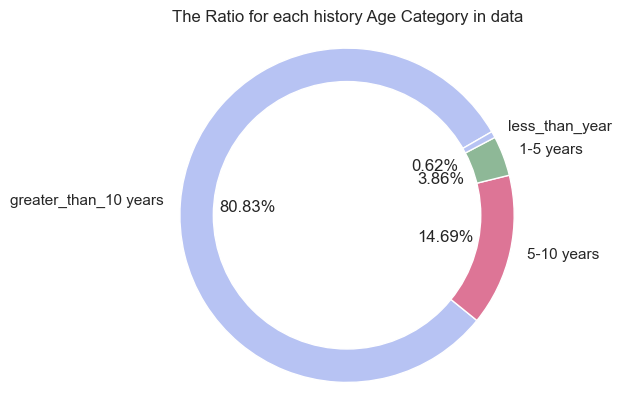

In [145]:
labels=history.index
sizes=history.values
fig, ax = plt.subplots()
ax.pie(x=sizes, labels=labels, startangle=30,autopct='%1.2f%%',colors=['#B7C3F3','#DD7596' , '#8EB897'])
ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('The Ratio for each history Age Category in data')
plt.show()

**Age Categories**

In [146]:
bins = [14,18,23,30,40,56]
labels = ['less_than_18','18-23','24-30','30-40','greater_than_40']
data['age_cat']=pd.cut(data.Age, bins=bins, labels=labels)

In [147]:
age=data['age_cat'].value_counts(normalize=True)

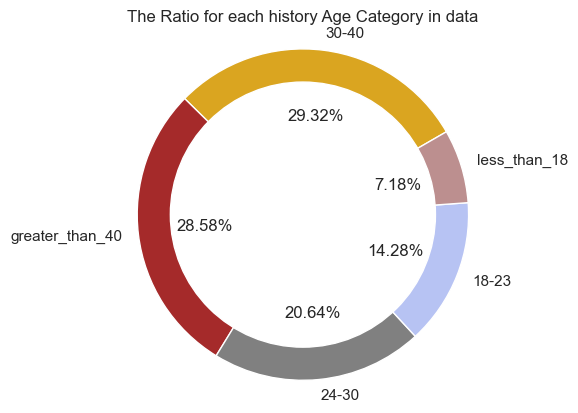

In [148]:
labels=age.index
sizes=age.values
fig, ax = plt.subplots()
ax.pie(x=sizes, labels=labels, startangle=30,autopct='%1.2f%%',colors=['goldenrod','brown','grey','#B7C3F3','rosybrown'])
ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('The Ratio for each history Age Category in data')
plt.show()

In [149]:
data['age_cat'].value_counts()

30-40              28968
greater_than_40    28236
24-30              20392
18-23              14109
less_than_18        7098
Name: age_cat, dtype: int64

**When the Type_of_Loan=No Data ,the Number_of_Loan is 0**

In [150]:
data[data['Type_of_Loan']=='No Data'].shape[0]

11408

In [151]:
data[data['Num_of_Loan']==0].shape[0]

11408

# Preprocessing for Type_of_Loan

In [152]:
def count(x):
    lst_of_loan=[]
    for i in x.str.split(','):
        for j in i:
            if (j.strip() not in lst_of_loan) and ('and' not in j.strip()) :
                lst_of_loan.append(j.strip()) 
    return lst_of_loan
            
lst=count(data['Type_of_Loan'])
lst 

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Not Specified',
 'No Data',
 'Debt Consolidation Loan',
 'Payday Loan',
 'Student Loan',
 'Home Equity Loan',
 'Mortgage Loan']

In [153]:
data_loan=data.copy()
for i in lst :
    data_loan[i]=0

In [154]:
data['Type_of_Loan'] = data['Type_of_Loan'].astype('str')
# dropping the 'and ' strings
data['Type_of_Loan'] = [item.replace('and ', '') for item in data['Type_of_Loan']]

data['Type_of_Loan'] = [item.replace(', ', ',') for item in data['Type_of_Loan']]
# splitting each item in the member of the feature by comma delimiter
data['Type_of_Loan'] = [item.split(',') for item in data['Type_of_Loan']]

In [155]:
for i in range(len(data['Type_of_Loan'])):
    data['Type_of_Loan'][i]=','.join(data['Type_of_Loan'][i])

In [156]:
for i in lst:
    for j in range(len(data['Type_of_Loan'])):        
        for k in data['Type_of_Loan'][j].split(','): 
               if k==i :
                    data_loan.loc[j,i]=1

In [157]:
data_loan.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Annual-cat,history-age-cat,age_cat,Auto Loan,Credit-Builder Loan,Personal Loan,Not Specified,No Data,Debt Consolidation Loan,Payday Loan,Student Loan,Home Equity Loan,Mortgage Loan
0,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,Lower-Class,greater_than_10 years,18-23,1,1,1,0,0,0,0,0,1,0
1,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good,Lower-Class,greater_than_10 years,18-23,1,1,1,0,0,0,0,0,1,0
2,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,Lower-Class,greater_than_10 years,18-23,1,1,1,0,0,0,0,0,1,0
3,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,Lower-Class,greater_than_10 years,18-23,1,1,1,0,0,0,0,0,1,0
4,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,Lower-Class,greater_than_10 years,18-23,1,1,1,0,0,0,0,0,1,0


In [39]:
data['Type_of_Loan'].value_counts()[:10]

No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: Type_of_Loan, dtype: int64

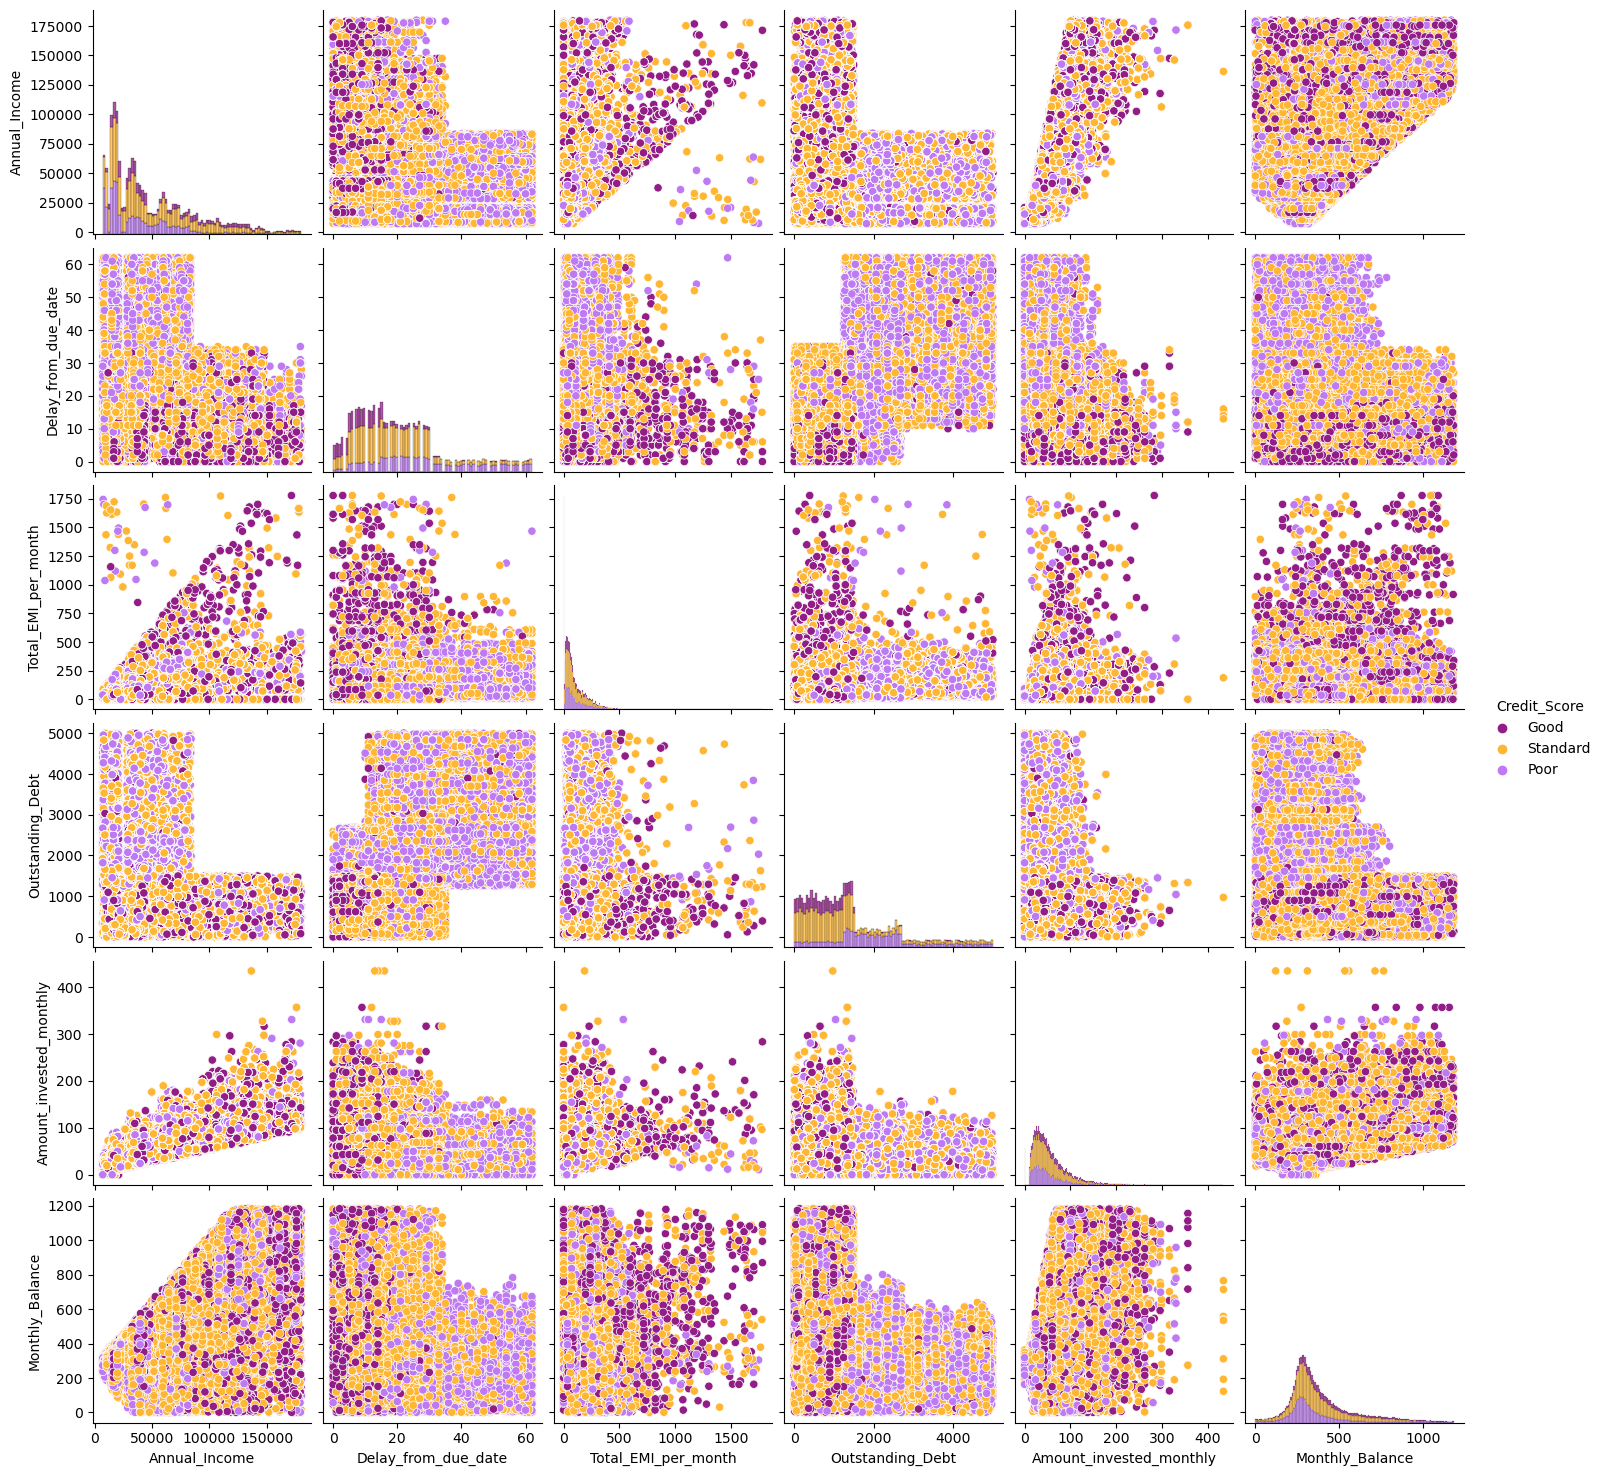

In [40]:
sns.pairplot(data,
    x_vars=['Annual_Income','Delay_from_due_date','Total_EMI_per_month','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance'],
    y_vars=['Annual_Income','Delay_from_due_date','Total_EMI_per_month','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance'],
    hue='Credit_Score',palette =my_pal,diag_kind='hist',diag_kws=dict(multiple="stack"))

# Step 4: Relationships with (Annual_Cat)

**Customers in Lower Class the most Payment_Behaviour was Low_spent_Small_value_payments**

**Customers in Middle Class the most Payment_Behaviour was High_spent_Large_value_payments & High_spent_Medium_value_payments in close ratios**

**Customers in Upper Class the most Payment_Behaviour was High_spent_Large_value_payments**

In [41]:
data.groupby(['Annual-cat'])['Payment_Behaviour'].value_counts(normalize=True)

Annual-cat    Payment_Behaviour               
Lower-Class   Low_spent_Small_value_payments      0.382739
              High_spent_Medium_value_payments    0.167397
              Low_spent_Medium_value_payments     0.132383
              High_spent_Small_value_payments     0.120668
              Low_spent_Large_value_payments      0.115962
              High_spent_Large_value_payments     0.080851
Middle-Class  High_spent_Large_value_payments     0.251063
              High_spent_Medium_value_payments    0.248065
              Low_spent_Medium_value_payments     0.160325
              Low_spent_Small_value_payments      0.132986
              High_spent_Small_value_payments     0.113389
              Low_spent_Large_value_payments      0.094172
Upper-Class   High_spent_Large_value_payments     0.316667
              Low_spent_Medium_value_payments     0.213095
              High_spent_Medium_value_payments    0.190476
              High_spent_Small_value_payments     0.099405
         

**Positive Relationship**

**When the Annual Income is increased, the Monthly Balance also increases**

In [42]:
data.groupby(['Annual-cat'])['Monthly_Balance'].mean()

Annual-cat
Lower-Class     310.184532
Middle-Class    519.925547
Upper-Class     641.331564
Name: Monthly_Balance, dtype: float64

In [43]:
Ann_month=data.groupby(['Annual-cat'])['Monthly_Balance'].mean().rename('Average of Monthly_Balance')
Ann_month=Ann_month.reset_index()

In [44]:
Ann_month

,Annual-cat,Average of Monthly_Balance
0,Lower-Class,310.184532
1,Middle-Class,519.925547
2,Upper-Class,641.331564


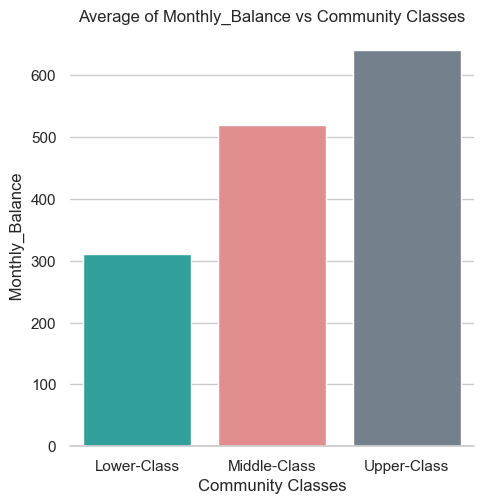

In [45]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=Ann_month,kind="bar", x="Annual-cat",y='Average of Monthly_Balance', palette=['lightseagreen','lightcoral','slategrey'])
g.despine(left=True)
g.set_axis_labels("Community Classes", " Monthly_Balance")
plt.title("Average of Monthly_Balance vs Community Classes")
plt.show()

**Positive Relationship**

**When the Annual Income is increased, the Total_EMI_per_month & Amount_invested_monthly also increases**

In [46]:
data.groupby(['Annual-cat'])['Total_EMI_per_month','Amount_invested_monthly'].mean()

,Total_EMI_per_month,Amount_invested_monthly
Annual-cat,,
Lower-Class,63.016567,34.386640
Middle-Class,176.653858,85.298220
Upper-Class,241.075583,155.591079


# Step 5: Relationships with (Monthly_Balance)

**Inverse Relationship**

**When the Num_of_Loan is increased, the Monthly_Balance & Amount_invested_monthly is decreases**

In [47]:
data.groupby(['Num_of_Loan'])['Monthly_Balance','Amount_invested_monthly'].mean()

,Monthly_Balance,Amount_invested_monthly
Num_of_Loan,,
0.0,526.096149,66.186393
1.0,489.289946,64.020588
2.0,436.190122,58.470797
3.0,417.216523,59.369530
4.0,380.021614,58.131280
5.0,312.174614,42.800967
6.0,292.873033,43.409904
7.0,269.462003,42.873022
8.0,249.857958,39.531423


**Dark red==> increase , white red==>decrease**

Text(0.5, 1.0, 'Correlation with Num_of_Loan vs Monthly_Balance')

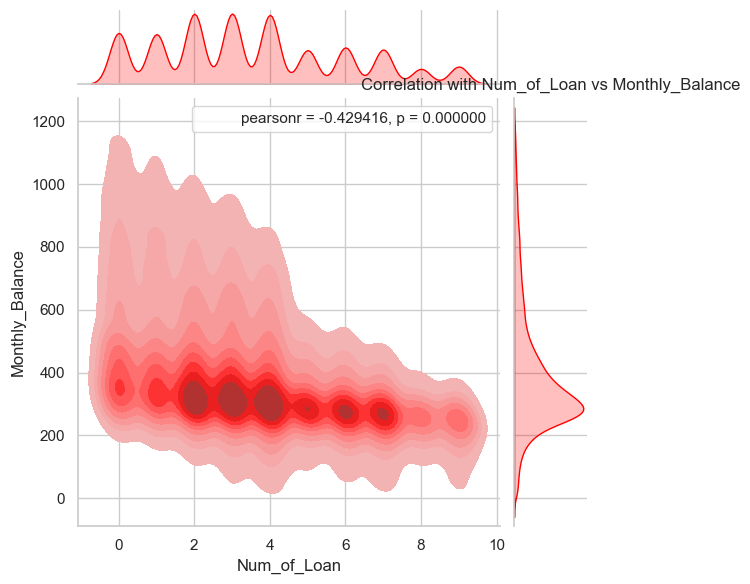

In [48]:
graph = sns.jointplot(data=data,x='Num_of_Loan',y='Monthly_Balance',kind="kde",color='red',joint_kws=dict(fill=True))
r, p = stats.pearsonr(data['Num_of_Loan'],data['Monthly_Balance'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['pearsonr = {:f}, p = {:f}'.format(r,p)])
plt.title('Correlation with Num_of_Loan vs Monthly_Balance')

# Step 6: Relationships with (Credit History Age)

**Inverse Relationship**

**When the Credit History Age is increased, the average of Number_of_Loan is decreases**

In [49]:
data.groupby(['history-age-cat'])['Num_of_Loan'].mean()

history-age-cat
less_than_year           7.055016
1-5 years                7.001295
5-10 years               5.480634
greater_than_10 years    2.986317
Name: Num_of_Loan, dtype: float64

**Median becauese number of loan must be integer**

In [50]:
data.groupby(['history-age-cat'])['Num_of_Loan'].median()

history-age-cat
less_than_year           7.0
1-5 years                7.0
5-10 years               6.0
greater_than_10 years    3.0
Name: Num_of_Loan, dtype: float64

**Inverse Relationship**

**When the Credit History Age is increased, the average of Num_Bank_Accounts& Num_Credit_Card is decreases**

In [51]:
data.groupby(['history-age-cat'])['Num_Bank_Accounts','Num_Credit_Card'].median()

,Num_Bank_Accounts,Num_Credit_Card
history-age-cat,,
less_than_year,9.0,7.0
1-5 years,8.0,7.0
5-10 years,7.0,6.0
greater_than_10 years,5.0,5.0


**Inverse Relationship**

**When the Credit History Age is increased, the average of Num_Credit_Inquiries& Interest_Rate is decreases**

In [52]:
data.groupby(['history-age-cat'])['Num_Credit_Inquiries','Interest_Rate'].mean()

,Num_Credit_Inquiries,Interest_Rate
history-age-cat,,
less_than_year,9.564725,24.215210
1-5 years,9.876166,24.717617
5-10 years,9.030495,21.375808
greater_than_10 years,4.987257,12.727802


**Inverse Relationship**

**When the Credit History Age is increased, the average of Outstanding_Debt& Changed_Credit_Limit is decreases**

In [53]:
data.groupby(['history-age-cat'])['Outstanding_Debt','Changed_Credit_Limit'].mean()

,Outstanding_Debt,Changed_Credit_Limit
history-age-cat,,
less_than_year,3841.100194,17.316861
1-5 years,3752.304114,18.912223
5-10 years,2318.026776,13.942182
greater_than_10 years,1134.592080,9.383835


**Inverse Relationship**

**When the Credit History Age is increased, the average of Outstanding_Debt& Delay_from_due_date is decreases**

In [54]:
data.groupby(['history-age-cat'])['Outstanding_Debt','Delay_from_due_date'].median()

,Outstanding_Debt,Delay_from_due_date
history-age-cat,,
less_than_year,3842.37,37.5
1-5 years,3772.55,37.0
5-10 years,2211.24,28.0
greater_than_10 years,987.07,15.0


**Positive Relationship**

**When the Credit History Age is increased, the average of Amount_invested_monthly is also increases**

In [55]:
data.groupby(['history-age-cat'])['Amount_invested_monthly'].mean()

history-age-cat
less_than_year           41.463919
1-5 years                38.477846
5-10 years               43.604384
greater_than_10 years    58.088979
Name: Amount_invested_monthly, dtype: float64

# Step 7: Relationships with (Outstanding Debt)

**Positive Relationship**

**When the Num_Bank_Accounts is increased, the average of Outstanding_Debt is also increases**

In [56]:
data.groupby(['Num_Bank_Accounts'])['Outstanding_Debt'].mean()

Num_Bank_Accounts
0.0      744.520586
1.0      731.108007
2.0      767.120862
3.0      879.219806
4.0      890.610036
5.0      894.295697
6.0     1775.034350
7.0     1775.389449
8.0     1764.032389
9.0     2790.912539
10.0    2884.142036
11.0    3384.910000
Name: Outstanding_Debt, dtype: float64

**Positive Relationship**

**When the Num_of_Loan is increased, the average of Outstanding_Debt is also increases**

In [57]:
data.groupby(['Num_of_Loan'])['Outstanding_Debt'].mean()

Num_of_Loan
0.0     766.436206
1.0     748.947800
2.0    1008.970611
3.0     973.813362
4.0     960.482277
5.0    2344.812550
6.0    2352.504096
7.0    2429.667219
8.0    3369.262950
9.0    3318.549315
Name: Outstanding_Debt, dtype: float64

# Step 8: Relationships with (Num_of_Loan)

**Positive Relationship**

**When the Num_of_Loan is increased, the average of Delay_from_due_date&Num_of_Delayed_Payment is also increases**

In [58]:
data.groupby(['Num_of_Loan'])['Delay_from_due_date','Num_of_Delayed_Payment'].median()

,Delay_from_due_date,Num_of_Delayed_Payment
Num_of_Loan,,
0.0,13.0,10.0
1.0,12.0,10.0
2.0,15.0,12.0
3.0,15.0,12.0
4.0,14.0,12.0
5.0,28.0,18.0
6.0,27.0,18.0
7.0,28.0,18.0
8.0,39.0,20.0


# Step 9: Relationships with (Age-Categorical)

**In all Age Categories the Bad Credit Score is always the highest and the Good Credit Score is the lower**

In [59]:
data.groupby(['age_cat','Credit_Mix'])['Outstanding_Debt'].mean()

age_cat          Credit_Mix
less_than_18     Bad           2987.760446
                 Good           777.718319
                 Standard      1255.761525
18-23            Bad           3042.726630
                 Good           763.626366
                 Standard      1102.454716
24-30            Bad           2977.762421
                 Good           733.419221
                 Standard      1085.020423
30-40            Bad           3027.770799
                 Good           741.332246
                 Standard      1073.615628
greater_than_40  Bad           2944.719202
                 Good           736.056446
                 Standard       941.404086
Name: Outstanding_Debt, dtype: float64

# Credit Score(Target)

**1-The Relation is :**

**when number of loans is less than 5 the ratio of Standard and Good Credit Score graeter than Poor Credit Score**

**when number of loans is equal or greater than 5 the ratio of Poor Credit Score graeter than Standard and Good Credit Score**

In [60]:
# Done In Excel
data.groupby(['Num_of_Loan'])['Credit_Score'].value_counts(normalize=True)

Num_of_Loan  Credit_Score
0.0          Standard        0.580996
             Good            0.301893
             Poor            0.117111
1.0          Standard        0.604331
             Good            0.284867
             Poor            0.110802
2.0          Standard        0.541879
             Poor            0.239117
             Good            0.219005
3.0          Standard        0.553136
             Good            0.228669
             Poor            0.218195
4.0          Standard        0.562823
             Good            0.224702
             Poor            0.212474
5.0          Poor            0.516870
             Standard        0.457359
             Good            0.025770
6.0          Poor            0.507367
             Standard        0.469425
             Good            0.023207
7.0          Poor            0.524089
             Standard        0.452083
             Good            0.023828
8.0          Poor            0.550360
             Standard   

In [61]:
bins = [0,4,10]
labels = ['v<5', '5<v']
data['loan-cat']=pd.cut(data.Num_of_Loan, bins=bins, labels=labels)
data.groupby(['loan-cat'])['Credit_Score'].value_counts(normalize=True)

loan-cat  Credit_Score
v<5       Standard        0.562483
          Good            0.235770
          Poor            0.201747
5<v       Poor            0.522230
          Standard        0.454917
          Good            0.022852
Name: Credit_Score, dtype: float64

In [62]:
fig1=data.groupby(['loan-cat'])['Credit_Score'].value_counts(normalize=True).rename('Ratio')
fig1=fig1.reset_index()

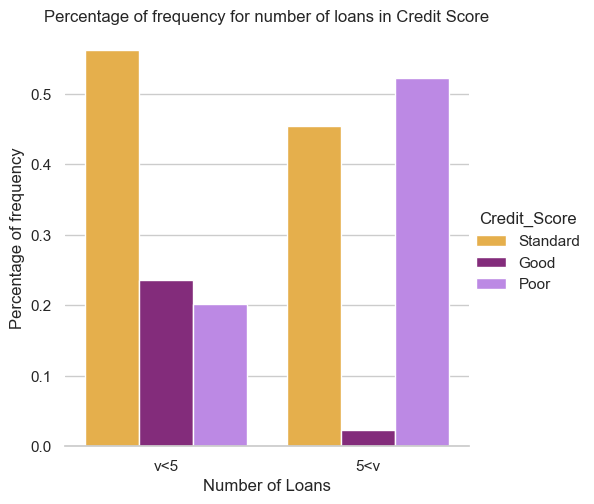

In [63]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=fig1,kind="bar", x="loan-cat",y='Ratio',hue="Credit_Score", palette=my_pal)
g.despine(left=True)
g.set_axis_labels("Number of Loans", "Percentage of frequency")
plt.title("Percentage of frequency for number of loans in Credit Score")
plt.show()

**2-There isn't any relation between number of Month with Credit Score**

In [64]:
# Don't Draw
data.groupby(['Month'])['Credit_Score'].value_counts(normalize=True)

Month  Credit_Score
1      Standard        0.55544
       Poor            0.28656
       Good            0.15800
2      Standard        0.55560
       Poor            0.28312
       Good            0.16128
3      Standard        0.55720
       Poor            0.28408
       Good            0.15872
4      Standard        0.51784
       Poor            0.29360
       Good            0.18856
5      Standard        0.51824
       Poor            0.29696
       Good            0.18480
6      Standard        0.51280
       Poor            0.29824
       Good            0.18896
7      Standard        0.51800
       Poor            0.28912
       Good            0.19288
8      Standard        0.51880
       Poor            0.28816
       Good            0.19304
Name: Credit_Score, dtype: float64

**3-There isn't any correlation between credit score and occupation**

**in all the types of ocuupation approximatly Standard,Poor ,Good Credit scores is convergent**

In [65]:
#Don't Draw
data.groupby(['Occupation'])['Credit_Score'].value_counts(normalize=True)

Occupation     Credit_Score
Accountant     Standard        0.519276
               Poor            0.302046
               Good            0.178677
Architect      Standard        0.547479
               Poor            0.271835
               Good            0.180686
Developer      Standard        0.533631
               Poor            0.286310
               Good            0.180060
Doctor         Standard        0.548112
               Poor            0.274665
               Good            0.177223
Engineer       Standard        0.510781
               Poor            0.305070
               Good            0.184149
Entrepreneur   Standard        0.515945
               Poor            0.305806
               Good            0.178249
Journalist     Standard        0.526622
               Poor            0.281518
               Good            0.191860
Lawyer         Standard        0.545660
               Poor            0.276917
               Good            0.177424
Manager     

**4-The customers whoes have high Credit history Age,the Outstanding Debt is decreases**

In [66]:
#Done IN Excel
#Only take the last two age cat (Stack his)
data.groupby(['history-age-cat','Credit_Score'])['Outstanding_Debt'].mean()

history-age-cat        Credit_Score
less_than_year         Good            3971.065000
                       Poor            3825.000903
                       Standard        3852.472492
1-5 years              Good            3699.109540
                       Poor            3754.740969
                       Standard        3752.419502
5-10 years             Good            1936.993984
                       Poor            2501.693578
                       Standard        2146.092685
greater_than_10 years  Good             760.093582
                       Poor            1743.057904
                       Standard        1011.446862
Name: Outstanding_Debt, dtype: float64

In [67]:
fig4=data.groupby(['history-age-cat','Credit_Score'])['Outstanding_Debt'].mean().rename('Average')
fig4=fig4.reset_index()

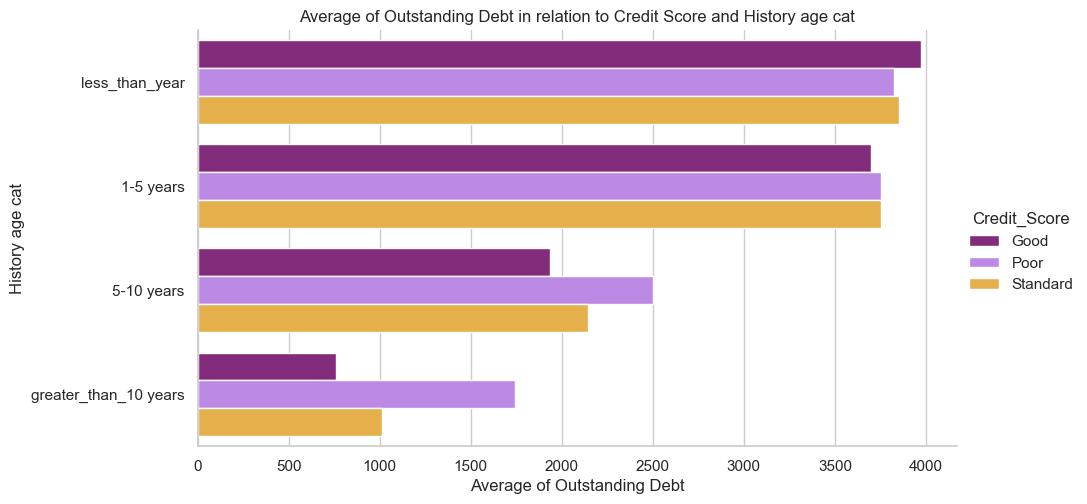

In [68]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=fig4,kind="bar", x="Average",y='history-age-cat',hue="Credit_Score", palette=my_pal,aspect=2)
g.despine(left=False)
g.set_axis_labels("Average of Outstanding Debt",'History age cat')
plt.title("Average of Outstanding Debt in relation to Credit Score and History age cat")
plt.show()

**5-When the History age increase, the degree of the Credit Score increase.**

In [69]:
#This relationship shows that hypothesis number 2 is rejected 
data.groupby(['history-age-cat'])['Credit_Score'].value_counts(normalize=True)

history-age-cat        Credit_Score
less_than_year         Standard        0.500000
                       Poor            0.483819
                       Good            0.016181
1-5 years              Standard        0.509585
                       Poor            0.467876
                       Good            0.022539
5-10 years             Poor            0.498673
                       Standard        0.475529
                       Good            0.025798
greater_than_10 years  Standard        0.543257
                       Poor            0.242073
                       Good            0.214670
Name: Credit_Score, dtype: float64

**6-Hypotheses number 4 is accepted, as that the increment of the Annual Income results in the increasement of Good Credit Score Ratio**

In [70]:
#This relationship shows that hypothesis number 4 is accepted
data.groupby(['Annual-cat'])['Credit_Score'].value_counts(normalize=True)

Annual-cat    Credit_Score
Lower-Class   Standard        0.521823
              Poor            0.329488
              Good            0.148689
Middle-Class  Standard        0.555059
              Poor            0.230021
              Good            0.214920
Upper-Class   Good            0.463690
              Standard        0.386310
              Poor            0.150000
Name: Credit_Score, dtype: float64

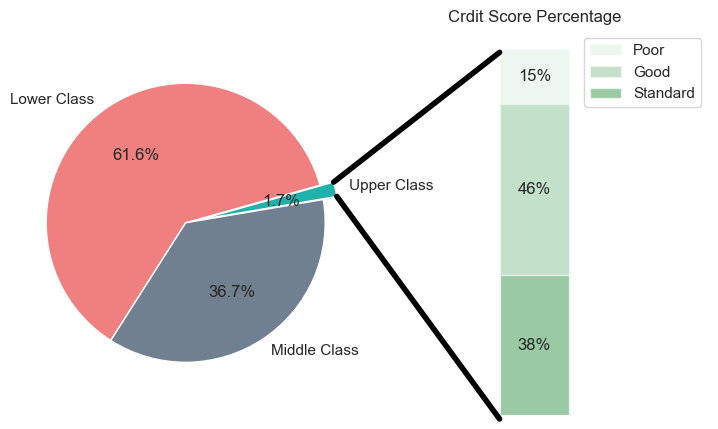

In [71]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [1.68, 61.63, 36.69]
labels = ['Upper Class', 'Lower Class', 'Middle Class']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = 220* overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode,colors=['lightseagreen','lightcoral','slategrey'])

# bar chart parameters
credit_ratios = [.38, .46, .15]
credit_labels = ['Standard', 'Good', 'Poor']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(credit_ratios, credit_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom,color='C2', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Crdit Score Percentage')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(credit_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

**7-
People in Lower& Middle class have more delays than people in Upper class.**

In [72]:
#Don't Draw
data.groupby(['Annual-cat','Credit_Score'])['Num_of_Delayed_Payment'].median()

Annual-cat    Credit_Score
Lower-Class   Good             9.0
              Poor            17.0
              Standard        15.0
Middle-Class  Good             8.0
              Poor            16.0
              Standard        13.0
Upper-Class   Good             6.0
              Poor             5.5
              Standard         6.0
Name: Num_of_Delayed_Payment, dtype: float64

**8-
The Investment becomes more higher when the Annual Income and Credit Score are increasing**

In [73]:
#Done In Excel
data.groupby(['Annual-cat','Credit_Score'])['Amount_invested_monthly'].mean()

Annual-cat    Credit_Score
Lower-Class   Good             37.583255
              Poor             33.008328
              Standard         34.346081
Middle-Class  Good             93.096418
              Poor             77.500886
              Standard         85.510012
Upper-Class   Good            158.463365
              Poor            156.878584
              Standard        151.643525
Name: Amount_invested_monthly, dtype: float64

In [74]:
fig8=data.groupby(['Annual-cat','Credit_Score'])['Amount_invested_monthly'].mean().rename('Average')
fig8=fig8.reset_index()

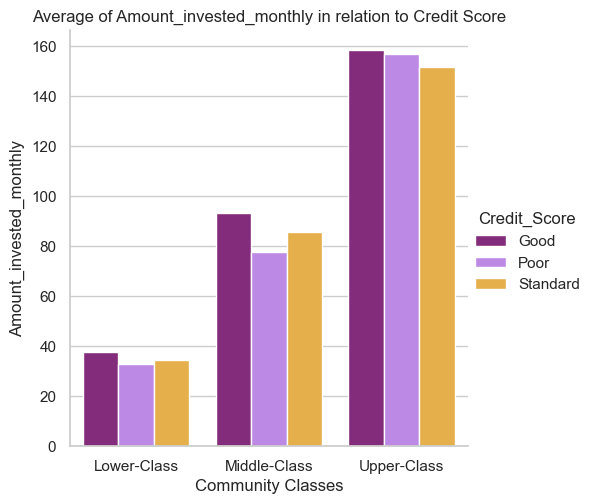

In [75]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=fig8,kind="bar", x="Annual-cat",y='Average',hue='Credit_Score', palette=my_pal)
g.despine(left=False)
g.set_axis_labels("Community Classes",'Amount_invested_monthly')
plt.title("Average of Amount_invested_monthly in relation to Credit Score")
plt.show()

**9-Matching Ratio between Credit Mix and Credit Score**

In [76]:
#Done In Excel
data.groupby(['Credit_Score'])['Credit_Mix'].value_counts(normalize=True)

Credit_Score  Credit_Mix
Good          Good          0.832847
              Standard      0.147465
              Bad           0.019688
Poor          Bad           0.492758
              Standard      0.339954
              Good          0.167287
Standard      Standard      0.627393
              Good          0.200944
              Bad           0.171663
Name: Credit_Mix, dtype: float64

**10-
While the number of credit card is lower, the Credit Score gets higher.**

In [77]:
data.groupby(['Credit_Score'])['Num_Bank_Accounts','Num_Credit_Card'].median()

,Num_Bank_Accounts,Num_Credit_Card
Credit_Score,,
Good,3.0,4.0
Poor,7.0,7.0
Standard,5.0,5.0


**11-
While the Interest Rate and Num of Credit Inquiries are lower, the Credit Score gets higher.**

In [78]:
#Done In Excel
data.groupby(['Credit_Score'])['Num_Credit_Inquiries','Interest_Rate'].mean()

,Num_Credit_Inquiries,Interest_Rate
Credit_Score,,
Good,3.298631,7.662329
Poor,8.179599,20.187116
Standard,5.337665,13.751420


**12-There is no relationship with Credit Utilization Ratio.**

In [79]:
#Don't Draw
data.groupby(['Credit_Score'])['Credit_Utilization_Ratio'].mean()

Credit_Score
Good        32.686107
Poor        31.986146
Standard    32.313820
Name: Credit_Utilization_Ratio, dtype: float64

**13-
The Credit Score gets higher when the Delay from due date is lower
and the annual income is high.**

In [80]:
#Don't Draw
data.groupby(['Credit_Score','Annual-cat'])['Delay_from_due_date'].median()

Credit_Score  Annual-cat  
Good          Lower-Class     10.0
              Middle-Class    10.0
              Upper-Class      8.0
Poor          Lower-Class     28.0
              Middle-Class    25.0
              Upper-Class     12.0
Standard      Lower-Class     19.0
              Middle-Class    16.0
              Upper-Class      8.0
Name: Delay_from_due_date, dtype: float64

**14-
People with Poor Credit Score paid only the minimum amount of their debt.
People with Good Credit Score paid more than the minimum amount of their debt.**

In [81]:
Cre_pay=data.groupby(['Credit_Score'])['Payment_of_Min_Amount'].value_counts(normalize=True).rename('Percentage')
Cre_pay=Cre_pay.reset_index()

In [82]:
Cre_pay

,Credit_Score,Payment_of_Min_Amount,Percentage
0,Good,No,0.766827
1,Good,NM,0.125926
2,Good,Yes,0.107247
3,Poor,Yes,0.714118
4,Poor,No,0.164563
5,Poor,NM,0.121319
6,Standard,Yes,0.558656
7,Standard,No,0.323918
8,Standard,NM,0.117426


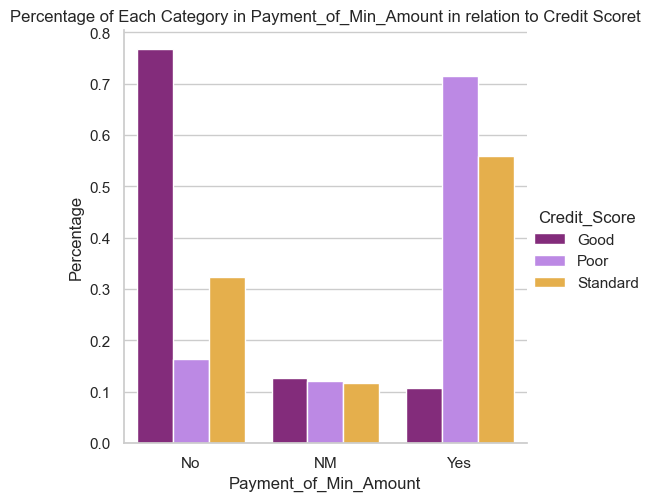

In [83]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=Cre_pay,kind="bar", x="Payment_of_Min_Amount",y='Percentage',hue='Credit_Score', palette=my_pal)
g.despine(left=False)
g.set_axis_labels('Payment_of_Min_Amount',"Percentage")
plt.title("Percentage of Each Category in Payment_of_Min_Amount in relation to Credit Scoret")
plt.show()

**15-
Weak relationship with a -0.05 precent between Total EMI per Month and Credit Score.**

In [84]:
data.groupby(['Credit_Score','Annual-cat'])['Total_EMI_per_month'].mean()

Credit_Score  Annual-cat  
Good          Lower-Class      52.654385
              Middle-Class    189.387115
              Upper-Class     248.607577
Poor          Lower-Class      73.329449
              Middle-Class    198.193040
              Upper-Class     249.511390
Standard      Lower-Class      59.457453
              Middle-Class    162.797500
              Upper-Class     228.759333
Name: Total_EMI_per_month, dtype: float64

**16-
Hypothesis Number 3 is Rejected, as it shows that Good Credit Score has High Spent behavior depending on the ratio.**

In [85]:
wendy=data.groupby(['Credit_Score'])['Payment_Behaviour'].value_counts(normalize=True).rename('Percentage')
wendy=wendy.reset_index()
wendy

,Credit_Score,Payment_Behaviour,Percentage
0,Good,High_spent_Medium_value_payments,0.221786
1,Good,Low_spent_Small_value_payments,0.207819
2,Good,High_spent_Large_value_payments,0.193235
3,Good,Low_spent_Medium_value_payments,0.145726
4,Good,High_spent_Small_value_payments,0.122672
5,Good,Low_spent_Large_value_payments,0.108761
6,Poor,Low_spent_Small_value_payments,0.350886
7,Poor,High_spent_Medium_value_payments,0.174943
8,Poor,Low_spent_Medium_value_payments,0.149803
9,Poor,High_spent_Small_value_payments,0.110870


In [86]:
wendy=wendy.iloc[[0,6,12]]
wendy

,Credit_Score,Payment_Behaviour,Percentage
0,Good,High_spent_Medium_value_payments,0.221786
6,Poor,Low_spent_Small_value_payments,0.350886
12,Standard,Low_spent_Small_value_payments,0.277128


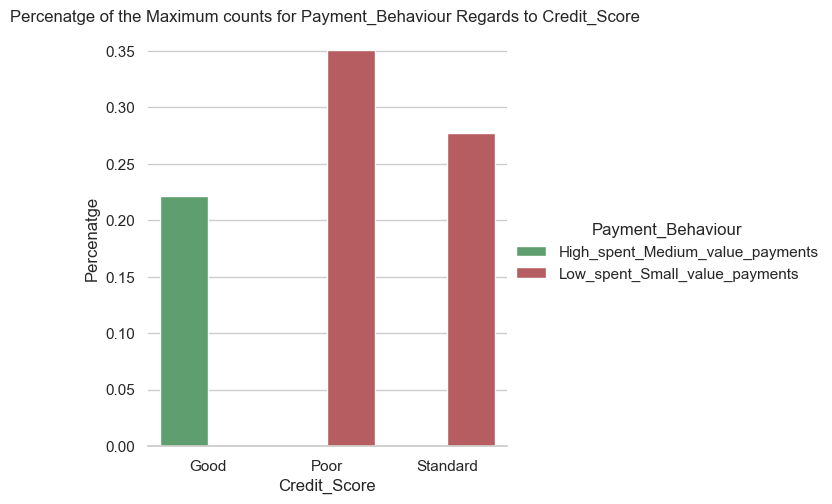

In [87]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=wendy,kind="bar", x="Credit_Score",y='Percentage',hue='Payment_Behaviour', palette=['g','r'],aspect=1,)
g.despine(left=True)
g.set_axis_labels("Credit_Score", "Percenatge")
plt.title("Percenatge of the Maximum counts for Payment_Behaviour Regards to Credit_Score ")
plt.show()

**17-
Weak relationship between Monthly Balance and Credit Score.Monthly Balance is related more with Annual income**

In [88]:
data.groupby(['Credit_Score','Annual-cat'])['Monthly_Balance'].mean()

Credit_Score  Annual-cat  
Good          Lower-Class     344.753842
              Middle-Class    571.092448
              Upper-Class     615.544166
Poor          Lower-Class     289.453376
              Middle-Class    448.788707
              Upper-Class     679.481743
Standard      Lower-Class     313.424309
              Middle-Class    529.593233
              Upper-Class     657.471069
Name: Monthly_Balance, dtype: float64

**18-
Weak relationship with between customer whose take Student Loan with their age.**

In [89]:
data_loan.groupby(['Student Loan','age_cat'])['Credit_Score'].value_counts()[1]

age_cat          Credit_Score
less_than_18     Standard        1490
                 Poor            1188
                 Good             140
18-23            Standard        2238
                 Poor            1690
                 Good             456
24-30            Standard        3053
                 Poor            2727
                 Good             738
30-40            Standard        4552
                 Poor            3668
                 Good            1067
greater_than_40  Standard        3839
                 Poor            2196
                 Good            1467
Name: Credit_Score, dtype: int64

**Hypotheses Number 2 is rejecte because the history age category when it increase isn’t affecting on the Ratio of Good credit score.**

In [90]:
data.groupby(['history-age-cat'])['Credit_Score'].value_counts()

history-age-cat        Credit_Score
less_than_year         Standard          309
                       Poor              299
                       Good               10
1-5 years              Standard         1967
                       Poor             1806
                       Good               87
5-10 years             Poor             7326
                       Standard         6986
                       Good              379
greater_than_10 years  Standard        43912
                       Poor            19567
                       Good            17352
Name: Credit_Score, dtype: int64

**19-When we have no data==>number of loan is 0 ==> standard and good Credit_Score in greater than poor .**

In [91]:
NoLoan_CreditScore=data_loan.groupby(['No Data'])['Credit_Score'].value_counts()[1].rename('count')
NoLoan_CreditScore=NoLoan_CreditScore.reset_index()

In [92]:
NoLoan_CreditScore

,Credit_Score,count
0,Standard,6628
1,Good,3444
2,Poor,1336


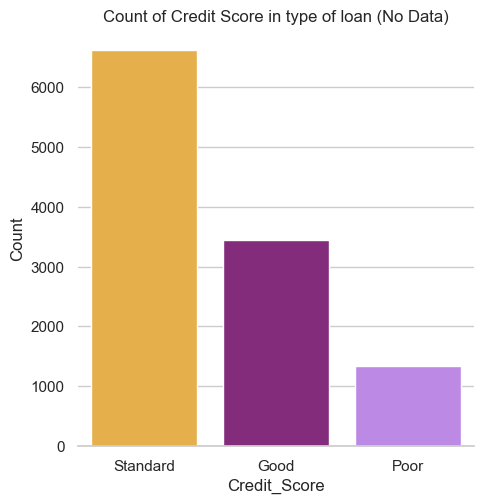

In [93]:
sns.set_theme(style="whitegrid")
g = sns.catplot(data=NoLoan_CreditScore,kind="bar", x="Credit_Score",y='count', palette=my_pal)
g.despine(left=True)
g.set_axis_labels("Credit_Score", "Count")
plt.title("Count of Credit Score in type of loan (No Data)")
plt.show()

# Feature Selection

In [158]:
#Feature Extraction
data_loan['delay_by_customer_mean']= data_loan.groupby(['Name'])['Delay_from_due_date'].transform('mean')
data_loan['monthlyBalance_by_customer_mean']= data_loan.groupby(['Name'])['Monthly_Balance'].transform('mean')

In [159]:
data_loan.to_csv('credit_score_data.csv',index=False)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [84]:
Occupation= pd.get_dummies(data_loan.Occupation, drop_first=True, prefix= 'Occupation_')
data_loan = data_loan.drop('Occupation', axis= 1)
data_loan= pd.concat([data_loan,Occupation], axis=1)

In [85]:
Payment_of_Min_Amount= pd.get_dummies(data_loan.Payment_of_Min_Amount, drop_first=True, prefix= 'Payment_of_Min_Amount_')
data_loan = data_loan.drop('Payment_of_Min_Amount', axis= 1)
data_loan= pd.concat([data_loan,Payment_of_Min_Amount], axis=1)

In [86]:
Payment_Behaviour= pd.get_dummies(data_loan.Payment_Behaviour, drop_first=True, prefix= 'Payment_Behaviour_')
data_loan = data_loan.drop('Payment_Behaviour', axis= 1)
data_loan= pd.concat([data_loan,Payment_Behaviour], axis=1)

In [87]:
data_loan['Credit_Score']=le.fit_transform(data2['Credit_Score'])
data_loan['Credit_Mix']=le.fit_transform(data_loan['Credit_Mix'])

In [88]:
data_loan.drop(['Name','SSN','Customer_ID','Type_of_Loan','Annual-cat','history-age-cat','age_cat'],axis=1,inplace=True)

In [89]:
X=data_loan.drop('Credit_Score',axis=1)
y=data_loan['Credit_Score']

In [90]:
data_loan.shape

(100000, 53)

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))

0.7565


In [93]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.8327


In [94]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
kbest=SelectKBest(mutual_info_classif,k=43)
kbest.fit(X_train,y_train)

SelectKBest(k=43,
            score_func=<function mutual_info_classif at 0x0000017C048035E0>)

In [95]:
X_new=kbest.fit_transform(X,y)
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=0)

In [96]:
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.8335


In [97]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X,y=y, K=29)
X_mr=X.loc[:,selected_features]
X_train,X_test,y_train,y_test = train_test_split(X_mr,y,test_size=0.2,random_state=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.03it/s]


In [98]:
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.8375


# Observation

**There is 7098 customer have age is less than 18**

In [99]:
data['age_cat'].value_counts()

30-40              28968
greater_than_40    28236
24-30              20392
18-23              14109
less_than_18        7098
Name: age_cat, dtype: int64

**There is 4417 customer does not any have bank acconts but it has alot of credit card**

In [100]:
data[(data['Num_Bank_Accounts']==0) & (data['Num_Credit_Card']!=0)].shape[0]

4417

**Here NM is obscure**

In [101]:
data['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

**No data ==> number of loan 0**

**not specified ==> unknown**

In [102]:
data['Type_of_Loan'].value_counts()[:2]

No Data          11408
Not Specified     1408
Name: Type_of_Loan, dtype: int64